In [107]:
import pandas as pd
import numpy as np
import lasio

### 1. Loading and Exploring Log Las File

Log Las is common data format for storing well log data in oil and gas industry. With las file it is easy to read and analyze well log information.

In [108]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import missingno as msno

Next we will load our data using lasio library

In [109]:
las=lasio.read('Well_1.las')

In [110]:
#we can see the sections of our las file using sections function
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

We are interested in Curve section as our descriptions are in this section, so we can extract each section part and their description

In [111]:
for item in las.sections['Curves']:
    print(f'Curve : {item.mnemonic}, \t Unit:{item.unit},\t Description: {item.descr}')

Curve : DEPT, 	 Unit:M,	 Description: Depth
Curve : TENS, 	 Unit:lbs,	 Description: Tension
Curve : LSPD, 	 Unit:mpm,	 Description: Line Speed
Curve : BS, 	 Unit:mm,	 Description: Bit Size
Curve : ETIM, 	 Unit:min,	 Description: Elapsed Time
Curve : DHTN, 	 Unit:lbs,	 Description: CH Tension
Curve : BTMP, 	 Unit:degC,	 Description: Borehole Temp
Curve : NPHI, 	 Unit:decp,	 Description: Neutron Porosity
Curve : NCPS, 	 Unit:cps,	 Description: DSN Near Counts
Curve : FCPS, 	 Unit:cps,	 Description: DSN Far Counts
Curve : NRAT, 	 Unit:NONE,	 Description: DSN Near to Far Ratio
Curve : NPHL, 	 Unit:decp,	 Description: Neu Por Lime
Curve : NPHS, 	 Unit:decp,	 Description: Neutron Porosity Sand
Curve : NPHD, 	 Unit:decp,	 Description: Neutron Porosity Dolo
Curve : GR, 	 Unit:api,	 Description: Gamma API
Curve : RHOB, 	 Unit:kg/m3,	 Description: Density
Curve : CORP, 	 Unit:kg/m3,	 Description: DensityCorrPos
Curve : CORM, 	 Unit:kg/m3,	 Description: DensityCorrNeg
Curve : DRHO, 	 Unit:kg/m3,	

### 2. Converting LAS file to a Pandas Dataframe

In [112]:
#converting las file to dataframe
las_df=las.df()

In [113]:
las_df

,TENS,LSPD,BS,ETIM,DHTN,BTMP,NPHI,NCPS,FCPS,NRAT,...,ITTT,ITTI,SPHI,LLS,LLD,CLLD,SP,MSFL,MSFU,CAL1
DEPT,,,,,,,,,,,,,,,,,,,,,
1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000.4,2308.5520,7.0,311.15,0.1912,-87.3785,82.5890,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000.5,2332.2097,6.8,311.15,0.1771,-87.6423,82.5375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000.6,2289.8608,4.5,311.15,0.1604,-87.6997,82.3109,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
las_df.describe()

,TENS,LSPD,BS,ETIM,DHTN,BTMP,NPHI,NCPS,FCPS,NRAT,...,ITTT,ITTI,SPHI,LLS,LLD,CLLD,SP,MSFL,MSFU,CAL1
count,19293.000000,19293.000000,1.929300e+04,19293.000000,19292.000000,19291.000000,19287.000000,19287.000000,19287.000000,19287.000000,...,19264.000000,19264.000000,19256.000000,19291.000000,19291.000000,19291.000000,19287.000000,19286.000000,19286.000000,19286.000000
mean,4235.007685,16.839527,3.111500e+02,69.055974,3826.737470,74.609164,0.284521,17913.773944,1928.013411,13.120929,...,248204.195306,18.913289,0.198966,22.125354,28.755660,11247.409221,51.926945,60.099685,158.781960,260.622064
std,785.861003,3.549512,6.633799e-11,34.492998,184.383310,7.793238,0.182140,3777.928153,1253.861445,5.163601,...,148480.542725,4.842738,0.136917,165.929280,221.286216,17911.838869,23.018118,993.502207,1706.735138,100.250228
min,2111.370600,2.100000,3.111500e+02,0.137900,-87.711200,58.908000,0.002900,10260.000000,280.000000,3.074200,...,22.425500,11.740300,-0.003800,0.321500,0.025000,0.078500,-3.170400,0.100000,0.100000,101.600000
25%,3588.580100,16.800000,3.111500e+02,41.664100,3762.228550,67.363000,0.132600,13760.000000,830.000000,8.596200,...,114314.751975,13.560350,0.047600,0.604900,0.025000,68.430850,35.877050,0.100000,0.100000,101.600000
50%,4343.535600,17.800000,3.111500e+02,69.370100,3803.672350,75.899800,0.207800,18720.000000,1780.000000,11.410700,...,245869.195300,19.028700,0.202200,7.222300,11.663200,85.739800,57.001400,1.334050,1.267750,317.900800
75%,4968.668500,19.300000,3.111500e+02,101.386900,3877.500125,82.249200,0.448400,20920.000000,2670.000000,18.551000,...,394619.101600,22.269825,0.293900,9.551650,14.613300,40000.000000,69.196400,3.083050,3.031300,326.258750
max,6231.723600,22.700000,3.111500e+02,125.648700,4999.239300,84.488000,1.083100,31336.000000,10265.000000,25.687700,...,478158.375000,32.130500,0.572600,6156.787100,12737.319300,40000.000000,91.282300,20000.000000,20000.000000,438.313500


In [115]:
las_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19994 entries, 1.5 to 2000.8
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TENS    19293 non-null  float64
 1   LSPD    19293 non-null  float64
 2   BS      19293 non-null  float64
 3   ETIM    19293 non-null  float64
 4   DHTN    19292 non-null  float64
 5   BTMP    19291 non-null  float64
 6   NPHI    19287 non-null  float64
 7   NCPS    19287 non-null  float64
 8   FCPS    19287 non-null  float64
 9   NRAT    19287 non-null  float64
 10  NPHL    19287 non-null  float64
 11  NPHS    19287 non-null  float64
 12  NPHD    19287 non-null  float64
 13  GR      19287 non-null  float64
 14  RHOB    19256 non-null  float64
 15  CORP    19256 non-null  float64
 16  CORM    19256 non-null  float64
 17  DRHO    19256 non-null  float64
 18  PE      19256 non-null  float64
 19  DPE     19256 non-null  float64
 20  QN      19256 non-null  float64
 21  QF      19256 non-null  float6

In [116]:
las_df.isnull().sum()

TENS    701
LSPD    701
BS      701
ETIM    701
DHTN    702
BTMP    703
NPHI    707
NCPS    707
FCPS    707
NRAT    707
NPHL    707
NPHS    707
NPHD    707
GR      707
RHOB    738
CORP    738
CORM    738
DRHO    738
PE      738
DPE     738
QN      738
QF      738
DPHI    738
DLIM    738
DPHD    738
DPHS    738
CALI    703
BHVT    703
AHVT    703
DT      738
ITTT    730
ITTI    730
SPHI    738
LLS     703
LLD     703
CLLD    703
SP      707
MSFL    708
MSFU    708
CAL1    708
dtype: int64

### Quick Plot

We can do quick plotting simply using plot function. We can also specify which value we want to do for plotting. For example in the code below I did for gamma ray api and neutron porosity.

<AxesSubplot:xlabel='DEPT'>

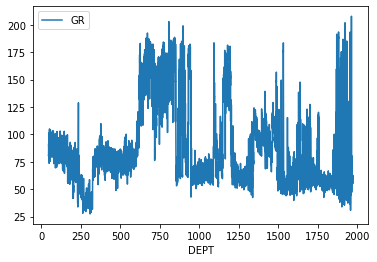

In [117]:
las_df.plot(y='GR')

<AxesSubplot:xlabel='DEPT'>

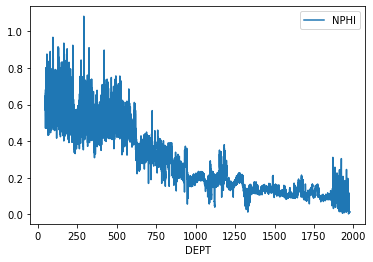

In [118]:
las_df.plot(y='NPHI')

### 3. Data filtration
Data filtration (choose whether to remove or replace Nan values in the data - give the reason
why such choice was made)

### Visualizing missing data

We will use missingno library to analyze our missing values and their correlation

<AxesSubplot:>

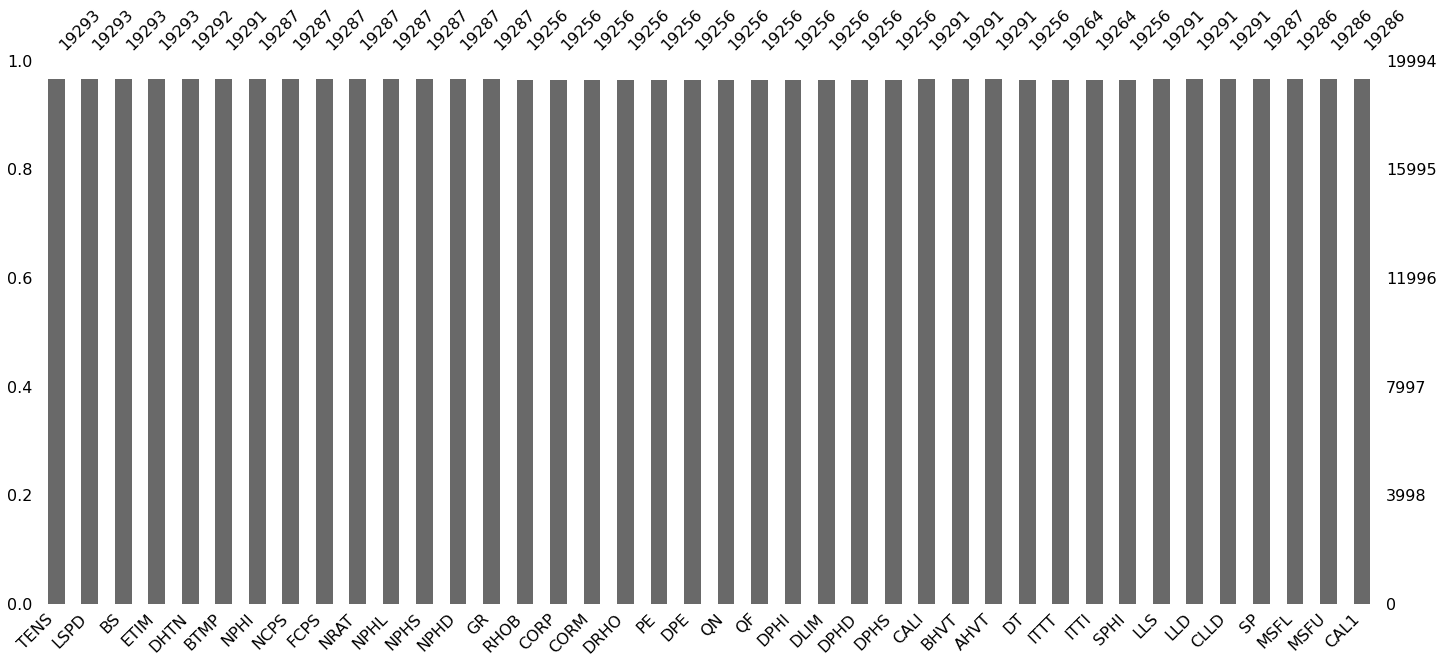

In [119]:
# Bar plot
msno.bar(las_df)

This bar chart visualize how many rows we can in our dataset and how many we have. On the left we can see the values change from 0 to 1 and it shows how much percentage of our column is non null value. We can observe that compare to our dataset we have very few missing values so we can drop these values

<AxesSubplot:>

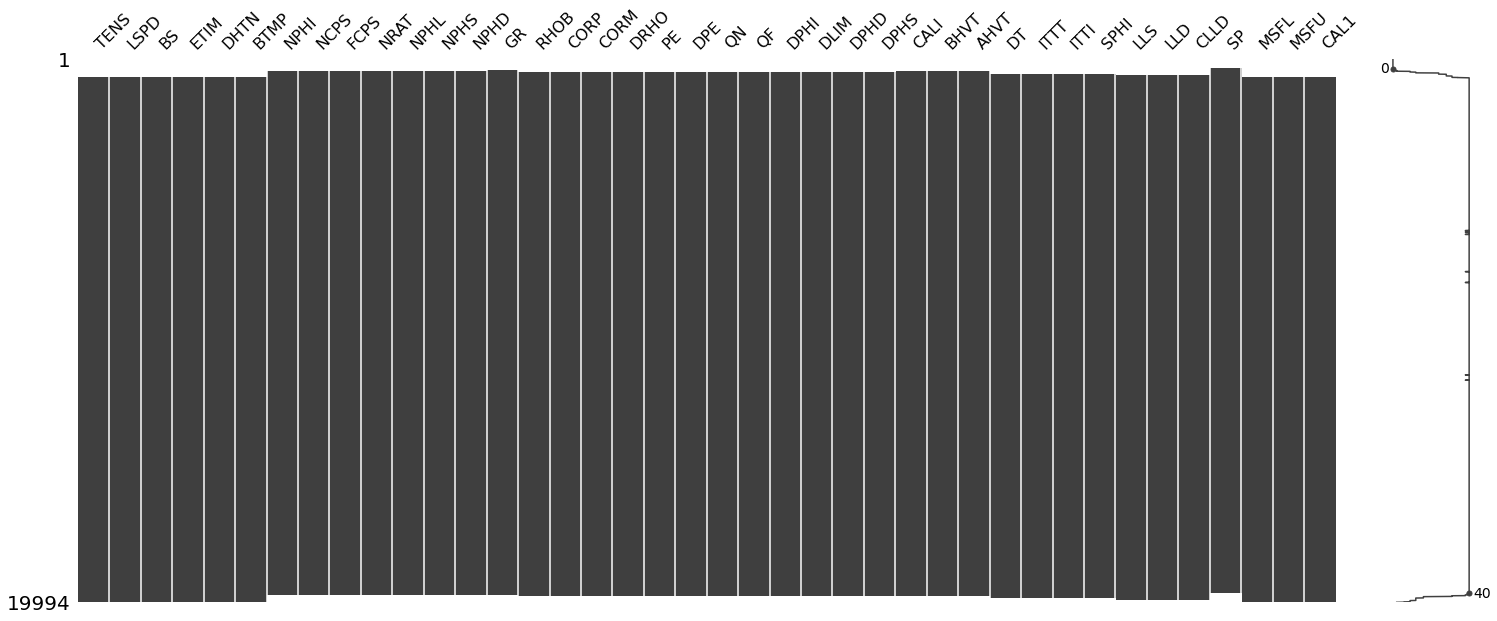

In [120]:
msno.matrix(las_df)

This matrix plot is good visualize missing values per depth. Here also we can see that we don't have missing values

## Drop missing values

In [121]:
#drop rows containing null values
las_df=las_df.dropna()

In [122]:
#checking missing values after dropping
las_df.isnull().sum()

TENS    0
LSPD    0
BS      0
ETIM    0
DHTN    0
BTMP    0
NPHI    0
NCPS    0
FCPS    0
NRAT    0
NPHL    0
NPHS    0
NPHD    0
GR      0
RHOB    0
CORP    0
CORM    0
DRHO    0
PE      0
DPE     0
QN      0
QF      0
DPHI    0
DLIM    0
DPHD    0
DPHS    0
CALI    0
BHVT    0
AHVT    0
DT      0
ITTT    0
ITTI    0
SPHI    0
LLS     0
LLD     0
CLLD    0
SP      0
MSFL    0
MSFU    0
CAL1    0
dtype: int64

So we have removed our missing values

### Plotting well log

In [123]:
#dataframe
las_df

,TENS,LSPD,BS,ETIM,DHTN,BTMP,NPHI,NCPS,FCPS,NRAT,...,ITTT,ITTI,SPHI,LLS,LLD,CLLD,SP,MSFL,MSFU,CAL1
DEPT,,,,,,,,,,,,,,,,,,,,,
71.8,2725.6951,12.0,311.15,125.6196,3729.0671,59.2161,0.6065,12240.0,660.0000,21.0274,...,475805.3750,13.8103,0.0547,0.6041,0.0250,40000.0000,91.1058,0.1000,0.1000,101.6000
71.9,2723.3118,12.6,311.15,125.6112,3729.0671,59.2210,0.5645,12590.0,710.0000,20.4543,...,475791.5625,13.8461,0.0557,0.6041,0.0250,40000.0000,90.9362,0.1000,0.1000,101.6000
72.0,2726.8442,13.5,311.15,125.6037,3707.8101,59.2210,0.5608,11950.0,580.0000,20.4009,...,475777.7188,13.8135,0.0548,0.6041,0.0250,40000.0000,90.7469,0.1000,0.1000,101.6000
72.1,2712.4902,13.7,311.15,125.5962,3707.8101,59.1476,0.6741,12730.0,580.0000,21.8629,...,475750.0625,13.8377,0.0555,0.6040,0.0250,40000.0000,90.3932,0.1000,0.1000,101.6000
72.2,2710.9265,14.8,311.15,125.5904,3703.0723,59.1476,0.6765,12950.0,620.0000,21.8899,...,475736.2188,13.8331,0.0554,0.6041,0.0250,40000.0000,90.1732,0.1000,0.1000,101.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966.9,5439.3486,9.8,311.15,4.1722,3895.5874,83.2693,0.0822,24575.0,4366.6665,6.5083,...,4350.5669,15.2127,0.0944,45.3696,71.5248,13.9812,25.9282,7.3693,5.6663,321.8150
1967.0,5416.7222,9.8,311.15,4.1614,3895.5874,83.3157,0.0840,24910.0,4230.0000,6.5846,...,4335.3540,15.1801,0.0934,45.2429,71.0848,14.0677,25.9167,6.6383,5.3439,321.8455
1967.1,5448.9385,9.8,311.15,4.1514,3897.5950,83.3570,0.0853,24920.0,4145.0000,6.6363,...,4320.1738,15.5844,0.1049,42.2347,65.2845,15.3176,25.9198,6.9138,7.9259,321.7643


To make it easier to work with dataframe I will add the index column, which is set to depth in dataframe. I will do this by resetting the index.

In [124]:
las_df.reset_index(inplace=True)

In [125]:
las_df

,DEPT,TENS,LSPD,BS,ETIM,DHTN,BTMP,NPHI,NCPS,FCPS,...,ITTT,ITTI,SPHI,LLS,LLD,CLLD,SP,MSFL,MSFU,CAL1
0,71.8,2725.6951,12.0,311.15,125.6196,3729.0671,59.2161,0.6065,12240.0,660.0000,...,475805.3750,13.8103,0.0547,0.6041,0.0250,40000.0000,91.1058,0.1000,0.1000,101.6000
1,71.9,2723.3118,12.6,311.15,125.6112,3729.0671,59.2210,0.5645,12590.0,710.0000,...,475791.5625,13.8461,0.0557,0.6041,0.0250,40000.0000,90.9362,0.1000,0.1000,101.6000
2,72.0,2726.8442,13.5,311.15,125.6037,3707.8101,59.2210,0.5608,11950.0,580.0000,...,475777.7188,13.8135,0.0548,0.6041,0.0250,40000.0000,90.7469,0.1000,0.1000,101.6000
3,72.1,2712.4902,13.7,311.15,125.5962,3707.8101,59.1476,0.6741,12730.0,580.0000,...,475750.0625,13.8377,0.0555,0.6040,0.0250,40000.0000,90.3932,0.1000,0.1000,101.6000
4,72.2,2710.9265,14.8,311.15,125.5904,3703.0723,59.1476,0.6765,12950.0,620.0000,...,475736.2188,13.8331,0.0554,0.6041,0.0250,40000.0000,90.1732,0.1000,0.1000,101.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18943,1966.9,5439.3486,9.8,311.15,4.1722,3895.5874,83.2693,0.0822,24575.0,4366.6665,...,4350.5669,15.2127,0.0944,45.3696,71.5248,13.9812,25.9282,7.3693,5.6663,321.8150
18944,1967.0,5416.7222,9.8,311.15,4.1614,3895.5874,83.3157,0.0840,24910.0,4230.0000,...,4335.3540,15.1801,0.0934,45.2429,71.0848,14.0677,25.9167,6.6383,5.3439,321.8455
18945,1967.1,5448.9385,9.8,311.15,4.1514,3897.5950,83.3570,0.0853,24920.0,4145.0000,...,4320.1738,15.5844,0.1049,42.2347,65.2845,15.3176,25.9198,6.9138,7.9259,321.7643
18946,1967.2,5475.0376,9.8,311.15,4.1414,3897.5950,83.3570,0.0901,24270.0,4055.0000,...,4288.5220,16.1794,0.1217,37.0742,52.0496,19.2125,26.0001,7.0919,7.7251,321.5822


I also changed some of the column names in dataframe so it will be more readable. I will use rename function for this.

In [126]:
las_df=las_df.rename(columns={'DEPT':'DEPTH', 'GR':'Gamma API', 'NPHI': 'Neutron Porosity' })

### Simple plots

<AxesSubplot:xlabel='Gamma API'>

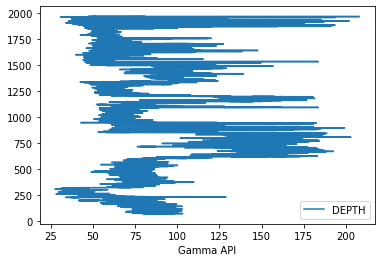

In [127]:
#plot Gamma API vs Depth
las_df.plot('Gamma API', 'DEPTH')

<AxesSubplot:xlabel='Neutron Porosity'>

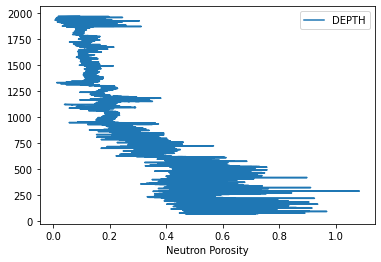

In [128]:
#plot Neutron Porosity vs Depth
las_df.plot('Neutron Porosity', 'DEPTH')

<AxesSubplot:xlabel='RHOB'>

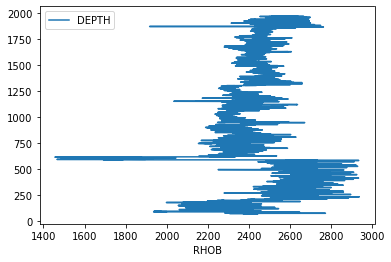

In [129]:
#Plot density vs Depth
las_df.plot('RHOB', 'DEPTH')

<AxesSubplot:xlabel='SPHI'>

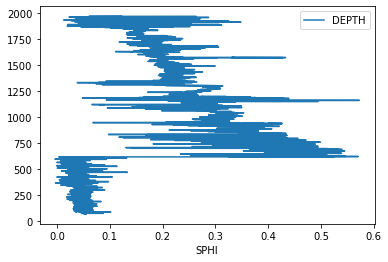

In [130]:
#Plot Acoustic Porosity vs Depth
las_df.plot('SPHI', 'DEPTH')

### Plot ONLY neutron porosity and Gamma API

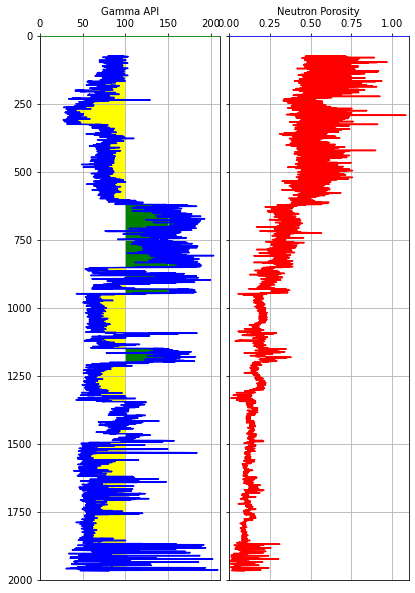

In [131]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['Gamma API', 'Neutron Porosity']


#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)


#Set up the Gamma ray log
ax1.plot("Gamma API", "DEPTH", data = las_df, color = "blue")
ax1.fill_betweenx(las_df['DEPTH'], 100, las_df['Gamma API'], where=las_df['Gamma API']<=100, facecolor='yellow')
ax1.fill_betweenx(las_df['DEPTH'], las_df['Gamma API'], 100, where=las_df['Gamma API']>=100, facecolor='green')
ax1.set_xlim(0, 210)
ax1.spines['top'].set_edgecolor('green')


#Set up the Neutron porosity log
ax2.plot("Neutron Porosity", "DEPTH", data = las_df, color = "red")
ax2.set_xlim(0, 1.10)
ax2.spines['top'].set_edgecolor('blue')


#Set up elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(2000, 0) # Depth range

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])

    if i == 3:
        ax.spines["top"].set_position(("axes", 1.08))
    else:
        ax.grid()


#Hide tick labels on the y-axis
for ax in [ax2, ax2]:
    plt.setp(ax.get_yticklabels(), visible = False)

#Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.05)

As it is mentioned in the task I only plotted the Gamma API and Neutron Porosity. From Gamma API reading we can observe that if it is less than 100 it is most probably sand because lower the gamma ray values indicates the sand. Greater than 100 shows shale, because as shale values increases the gamma ray will also increase.

### Plotting Gamma API , Neutron Porosity and Density

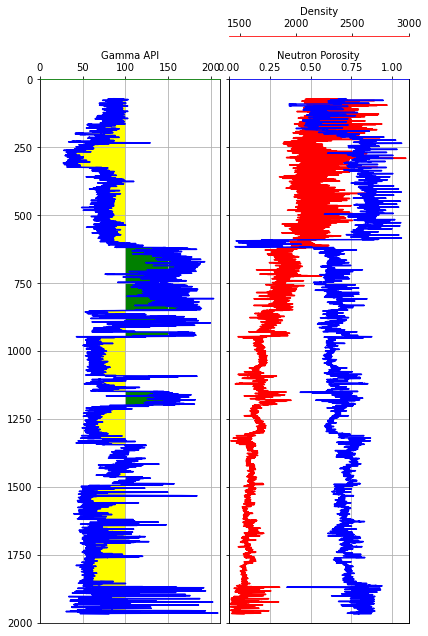

In [132]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['Gamma API', 'Neutron Porosity', 'Density']


#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3=ax2.twiny()


#Set up the Gamma ray log
ax1.plot("Gamma API", "DEPTH", data = las_df, color = "blue")
ax1.fill_betweenx(las_df['DEPTH'], 100, las_df['Gamma API'], where=las_df['Gamma API']<=100, facecolor='yellow')
ax1.fill_betweenx(las_df['DEPTH'], las_df['Gamma API'], 100, where=las_df['Gamma API']>=100, facecolor='green')
ax1.set_xlim(0, 210)
ax1.spines['top'].set_edgecolor('green')


#Set up the Neutron porosity log
ax2.plot("Neutron Porosity", "DEPTH", data = las_df, color = "red")
ax2.set_xlim(0, 1.10)
ax2.spines['top'].set_edgecolor('blue')


#Set up the density
ax3.plot("RHOB", "DEPTH", data = las_df, color = "blue")
ax3.set_xlim(1400, 3000)
ax3.spines['top'].set_edgecolor('red')


#Set up elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(2000, 0) # Depth range

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])

    if i == 2:
        ax.spines["top"].set_position(("axes", 1.08))
    else:
        ax.grid()


#Hide tick labels on the y-axis
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)

#Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.05)